Alumno: José Antonio Méndez Castillo
Materia: Redes bayesianas

#                                                   Algoritmo basaso en restricciones

In [46]:
import math
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from itertools import combinations
from scipy.stats import chi2
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig
from pgmpy.estimators import K2Score, MaximumLikelihoodEstimator, BicScore
import random
import copy

In [26]:
def InformationGain(df,x,y):
    # Entropia de una variable
    sum_e = 0
    conteo = df[y].value_counts()
    for p_i in conteo:
        sum_e+= (-p_i/len(df))*math.log2(p_i/(len(df)))
    print(f'Entropia de la variable {y}: {sum_e}')
    # ----------------------------------------------------------------------

    # Agrupar por 'x' y 'y'
    grouped = df.groupby([x, y]).size()

    # Crear una lista de listas para almacenar los tamaños de cada combinación
    listas_de_conteo = []
    # Crear un diccionario para agrupar por 'x'
    dict_por_var = {}

    # Recorrer cada combinación y agregar los tamaños a las listas correspondientes
    for (i, j), conteo in grouped.items():
        if i not in dict_por_var:
            dict_por_var[i] = []
        dict_por_var[i].append(conteo)

    # Convertir el diccionario a una lista de listas
    listas_de_conteo = list(dict_por_var.values())

    print(f"Listas de listas de conteo por combinaciones de '{x}' y '{y}':")
    print(listas_de_conteo)

    entropis = [] # Almacenar las entropias de los diferentes valores de x

    suma_variables = []
    # Calcular la entropía para cada lista de listas
    for lista in listas_de_conteo:
        suma_total = 0
        # [2, 2, 4] = 8
        for num in lista:
            suma_total+=num
        suma_variables.append(suma_total)

        entropia = 0  # Variable para acumular la entropía de esta lista
        for p_i in lista:
            entropia += (-(p_i)/suma_total)*math.log2(p_i/suma_total) # formula de la entropia
        entropis.append(entropia)
    print(f'entropias: {entropis}')

    # obtener la entropia general E(T,X) = SUMATORIA (P(c)*E(c))
    e_general = 0
    for val,entro in zip(suma_variables,entropis):
        e_general+= (val/len(df))*entro
    print(f'Entropia general de {y}|{x}: {e_general}')

    # obtener la ganancia de informacion Ganancia(T,X) = Entropia (T) - Entropia (T,X)
    ganancia = sum_e - e_general
    print(f'La ganacia de informacion de {y}|{x} = {ganancia}')
    print('-------------------------------------------------------------------------------------------------------')
    return ganancia

# generar las combinaciones entre las variables de dataset
def combinationss(df):
    variables = []
    for v in df:
        variables.append(v)
    c = list(combinations(variables,2))
    return c

# obtener las ganancias de informacion de cada par de variables del conjunto de datos
def infoGainDataFrame(df):
    ganancias = []
    combinaciones = combinationss(df)
    print(combinaciones)
    for c in combinaciones:
        v = c[0] # variable uno de la combinacion
        v2 = c[1] # variable dos de la combinacion
        g = InformationGain(df,v,v2)
        ganancias.append([v,v2,g])
    return ganancias

# obtener el valor de la chi cuadrada para las pruebas de hipotesis
def chi(df,alpha):
    # Valor crítico de chi cuadrada
    chi_cuadrado= chi2.ppf(1 - alpha, df)
    return chi_cuadrado

# obtener l conteo de los valores unicos de una variable
def conteo(var):
    val = df[var].unique()
    num_val = len(val)
    return num_val


def prueba_hip(df,ganancias,significancia):
    n = len(df) # obtener la longitud del dataframe (filas)
    ind = []
    for i in ganancias: # se recorre cada una de las ganancias de informacion
        t = 2*n*i[2]

        # gl = grados de libertad
        gl = (conteo(i[0])-1)*(conteo(i[1])-1)
        chi_c = chi(gl,significancia)

        if t >= chi_c:
            print(f'{i[0]} y {i[1]}: Son dependientes')
            ind.append([i[0],i[1]])
        else:
            print(f'{i[0]} y {i[1]}: Son independientes')
    
    print('\n')
    print(f'Variables dependientes: {ind}')
            
    return ind



# df = pd.read_csv('C:/Users/abrah/OneDrive/Escritorio/iris-discretizada.csv')
#df = pd.read_csv('C:/Users/abrah/Downloads/lentes.csv')
df = pd.read_csv('C:/Users/abrah/Downloads/Covid_CDMX_balanc.csv')
# Cambiar el tipo de dato de todas las columnas a string
df = df.astype(str)
print(f'Columnas del dataframe: {df.columns}')
print('\n')
# obtener la ganancia de informacion de cada combinacion de las variables
gan = infoGainDataFrame(df)
# determinar que variables son dependientes e independientes por medio de la prueba de hipotesis
niv_significancia = [0.10,0.05,0.01]
resultados = []
for sig in niv_significancia:
    ph = prueba_hip(df,gan,sig)
    resultados.append(ph)
    print('\n')

Columnas del dataframe: Index(['sex', 'age', 'diabetes', 'epoc', 'asthma', 'hypertens', 'cardio',
       'obesity', 'chronic_renal', 'smoker', 'dead'],
      dtype='object')


[('sex', 'age'), ('sex', 'diabetes'), ('sex', 'epoc'), ('sex', 'asthma'), ('sex', 'hypertens'), ('sex', 'cardio'), ('sex', 'obesity'), ('sex', 'chronic_renal'), ('sex', 'smoker'), ('sex', 'dead'), ('age', 'diabetes'), ('age', 'epoc'), ('age', 'asthma'), ('age', 'hypertens'), ('age', 'cardio'), ('age', 'obesity'), ('age', 'chronic_renal'), ('age', 'smoker'), ('age', 'dead'), ('diabetes', 'epoc'), ('diabetes', 'asthma'), ('diabetes', 'hypertens'), ('diabetes', 'cardio'), ('diabetes', 'obesity'), ('diabetes', 'chronic_renal'), ('diabetes', 'smoker'), ('diabetes', 'dead'), ('epoc', 'asthma'), ('epoc', 'hypertens'), ('epoc', 'cardio'), ('epoc', 'obesity'), ('epoc', 'chronic_renal'), ('epoc', 'smoker'), ('epoc', 'dead'), ('asthma', 'hypertens'), ('asthma', 'cardio'), ('asthma', 'obesity'), ('asthma', 'chronic_renal'), 

Validar que las estructuras no tengan ciclos

In [33]:
# Función para verificar si una estructura es un DAG 
def is_dag(edges, nodes):
    G = ig.Graph(directed=True)
    G.add_vertices(nodes)
    G.add_edges(edges)
    cycles = G.feedback_arc_set()
    return not cycles

columnas = ['sex', 'age', 'diabetes', 'epoc', 'asthma', 'hypertens', 'cardio',
       'obesity', 'chronic_renal', 'smoker', 'dead']

for i in resultados:
    a = is_dag(i,columnas)
    print(a)

True
True
True


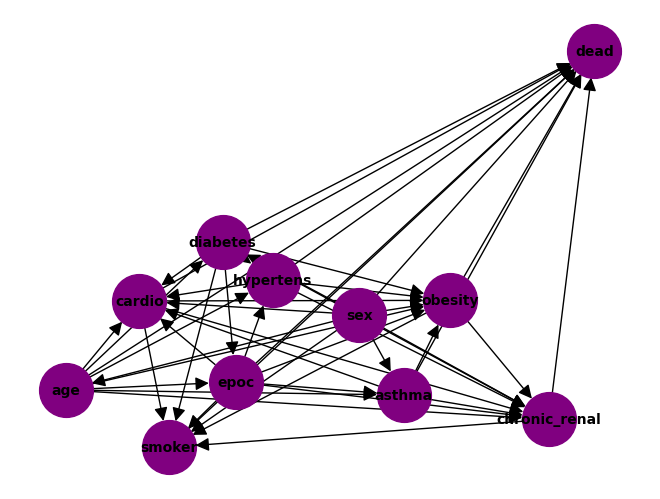

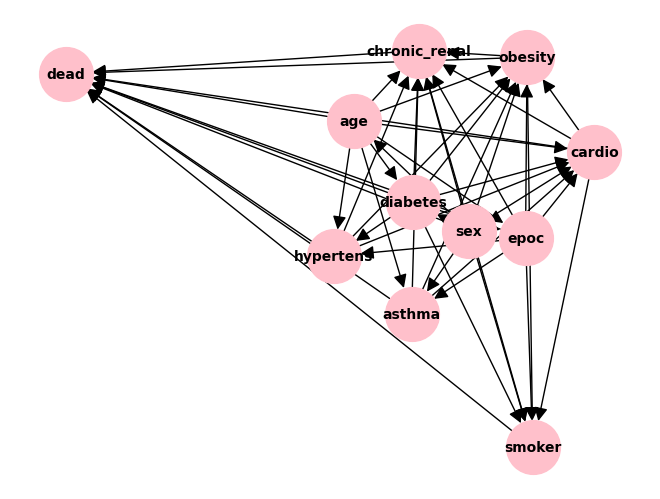

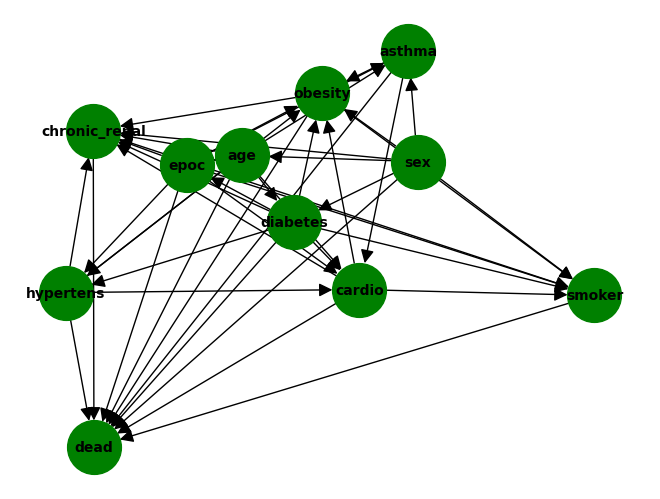

In [73]:
# obtener el modelo grafico de la red bayesiana
for r in resultados:
    df = pd.DataFrame(r, columns=['Source', 'Target'])

    # Crear un grafo dirigido
    G = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=nx.DiGraph())

    # Dibujar el grafo
    pos = nx.spring_layout(G)
    color = ['red','green','purple','pink','brown']
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color=random.choice(color), font_size=10, font_weight="bold", arrowsize=20)
    plt.show()

Estructura de la red bayesiana con restricciones

In [208]:
data = pd.read_csv('C:/Users/abrah/Downloads/Covid_CDMX_balanc.csv')
# Cambiar el tipo de dato de todas las columnas a string
data = data.astype(str)

In [209]:
data.head()

,sex,age,diabetes,epoc,asthma,hypertens,cardio,obesity,chronic_renal,smoker,dead
0,0,(-inf-60],0,0,0,0,0,0,0,0,0
1,0,(-inf-60],0,0,0,1,0,0,0,0,0
2,0,(-inf-60],0,0,0,0,0,0,0,0,0
3,0,(-inf-60],0,0,0,0,0,0,0,0,0
4,0,(-inf-60],0,0,0,0,0,0,0,0,0


In [210]:
data['age'].unique()

array(['(-inf-60]', '(60-inf)'], dtype=object)

In [80]:
# Estructura 1
best_model1 = BayesianNetwork(resultados[0]) # crear la estructura de la red bayesiana para poder utilizar la biblioteca
best_model1.fit(data, estimator=MaximumLikelihoodEstimator) # calcular las tablas de probabilidad (parametros de la red) de la estructura bayesiana

# Estructura 2
best_model2 = BayesianNetwork(resultados[1])
best_model2.fit(data, estimator=MaximumLikelihoodEstimator)

# Estructura 3
best_model3 = BayesianNetwork(resultados[2]) 
best_model3.fit(data, estimator=MaximumLikelihoodEstimator)

Calcular inferencias: clasificar nuevas observaciones

In [81]:
from pgmpy.inference import VariableElimination

In [83]:
# permite hacer preguntas a nuestro modelo bayesiano entrenado.
infer1 = VariableElimination(best_model1) # actualizacion de creencias
infer2 = VariableElimination(best_model2)
infer3 = VariableElimination(best_model3)

sex	age	diabetes	epoc	asthma	hypertens	cardio	obesity	chronic_renal	smoker	dead

In [214]:
# Ejemplo de predicción con nuevas observaciones
# nueva_observacion = {'sex': '1','age': '(60-inf)', 'diabetes': '0', 'epoc': '0', 'hypertens': '1', 'obesity': '1', 'asthma': '0', 'smoker': '1'}
nueva_observacion = {'epoc': '0', 'hypertens': '0' ,'cardio': '1', 'smoker': '1'}
# infer.map_query: realiza inferencia sobre la red bayesiana.
# Inferencia MAP (Maximum A Posteriori).
# Utiliza el algoritmo de inferencia (eliminación de variables) para calcular la probabilidad de cada posible valor de la variable 'Recomendacion' dado los valores observados
# Devuelve el valor de 'Recomendacion' que maximiza la probabilidad condicional dada la evidencia proporcionada.
# Eliminación de Variables:  elimina las variables no deseadas en una red bayesiana para calcular la probabilidad marginal de las variables de interés.
prediccion1 = infer1.map_query(variables=['dead'], evidence=nueva_observacion)
prediccion2 = infer2.map_query(variables=['dead'], evidence=nueva_observacion)
prediccion3 = infer3.map_query(variables=['dead'], evidence=nueva_observacion)
print("Predicción para la nueva observación de la estructura 1:", prediccion1)
print("Predicción para la nueva observación de la estructura 2:", prediccion2)
print("Predicción para la nueva observación de la estructura 3:", prediccion3)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Predicción para la nueva observación de la estructura 1: {'dead': '1'}
Predicción para la nueva observación de la estructura 2: {'dead': '1'}
Predicción para la nueva observación de la estructura 3: {'dead': '1'}


In [215]:
prediccion_proba = infer1.query(variables=['dead'], evidence=nueva_observacion)
print("Prediccion para 'dead' con la primer estructura:", prediccion_proba)

prediccion_proba2 = infer2.query(variables=['dead'], evidence=nueva_observacion)
print("Prediccion para 'dead' con la segunda estructura:", prediccion_proba2)

prediccion_proba3 = infer2.query(variables=['dead'], evidence=nueva_observacion)
print("Prediccion para 'dead' con la tercer estructura:", prediccion_proba3)

Prediccion para 'dead' con la primer estructura: +---------+-------------+
| dead    |   phi(dead) |
+=========+=============+
| dead(0) |      0.2819 |
+---------+-------------+
| dead(1) |      0.7181 |
+---------+-------------+
Prediccion para 'dead' con la segunda estructura: +---------+-------------+
| dead    |   phi(dead) |
+=========+=============+
| dead(0) |      0.2819 |
+---------+-------------+
| dead(1) |      0.7181 |
+---------+-------------+
Prediccion para 'dead' con la tercer estructura: +---------+-------------+
| dead    |   phi(dead) |
+=========+=============+
| dead(0) |      0.2819 |
+---------+-------------+
| dead(1) |      0.7181 |
+---------+-------------+


Consultas

In [107]:
# Para obtener la probabilidad de tener 'hypertens' dado que tiene 'asthma'
probabilidad_ = infer1.query(variables=['hypertens'], evidence={'asthma': '0'})
print("Probabilidad de tener hypertens dado que tiene asthma:", probabilidad_)

Probabilidad de tener hypertens dado que tiene asthma: +--------------+------------------+
| hypertens    |   phi(hypertens) |
+==============+==================+
| hypertens(0) |           0.7367 |
+--------------+------------------+
| hypertens(1) |           0.2633 |
+--------------+------------------+


#                                           Basado en busqueda: hill climbing (metrica BIC y K2)

Metrica: k2

In [142]:
def combinaciones_var(variables_names):
    # Generar todas las combinaciones posibles de aristas
    all_possible_edges = [(u, v) for u in variables_names for v in variables_names if u != v]
    return all_possible_edges

# Función para verificar si una estructura es un DAG 
def is_dag(edges, nodes):
    G = ig.Graph(directed=True)
    G.add_vertices(nodes)
    G.add_edges(edges)
    cycles = G.feedback_arc_set()
    return not cycles

def invertir_direccion(edges, variables):
    if len(edges) == 1:
        return [(edges[0][1], edges[0][0])]

    possible_edges = edges[:] # lista auxiliar
    random.shuffle(possible_edges) # barajar las variables
    
    for al in possible_edges:
        reverso = (al[1], al[0])
        index = edges.index(al)
        edges[index] = reverso
        
        if is_dag(edges, variables):
            return edges
        else:
            edges[index] = al

    return edges

def add_arco(edges, tupla, nodes):
    # Convertir la lista de tuplas en una tupla única concatenada
    tup = tuple([item for sublist in tupla for item in sublist])

    # Obtener todos los arcos posibles a agregar
    possible_arcs = [t for t in edges if t not in tupla and t[0] in tup]

    # Barajar los arcos posibles para intentar en orden aleatorio
    random.shuffle(possible_arcs)

    for r in possible_arcs:
        tupla.append(r)
        if is_dag(tupla, nodes):
            return tupla
        else:
            tupla.remove(r)

    # Si no se puede agregar ningún arco sin formar un ciclo, retornar la estructura original
    return tupla

def delete_arco(estructura):
    if len(estructura) > 1:
        eliminar = random.choice(estructura)
        estructura.remove(eliminar)
        return estructura
    else:
        return estructura


# Cargar el conjunto de datos
df = pd.read_csv('C:/Users/abrah/Downloads/Covid_CDMX_balanc.csv')
# Cambiar el tipo de dato de todas las columnas a string
df = df.astype(str)
# Obtener los nombres de las variables
all_var = list(df.columns)
print(f'Columnas del dataframe: {all_var}')
print('\n')
# Generar las combinaciones entre pares de variables
combinaciones = combinaciones_var(all_var)

all_estructuras = [] # Almacenar las estructuras evaluadas
all_scores = []

# Mejores puntajes y estructuras
best_puntaje_k2 = float('inf')
best_structure_k2 = None
# Empezar con una estructura inicial al azar
estructura_ = [random.choice(combinaciones)]
#estructura_ = [('Astigmatismo', 'Lagrima')]
scoresss = []

iterations_con_mejora = 0
max_iterations_con_mejora = 5 # maximo de iteraciones en caso de que el puntaje no mejore

for i in range(100):
    if iterations_con_mejora >= max_iterations_con_mejora:
        break

    seleccion = random.randint(1, 3)
    
    if seleccion == 1 and len(estructura_) < len(all_var) * (len(all_var) - 1):
        estructura_ = add_arco(combinaciones, estructura_, all_var)
    elif seleccion == 2:
        estructura_ = invertir_direccion(estructura_, all_var)
    else:
        estructura_ = delete_arco(estructura_)

    all_estructuras.append(estructura_)

    model = BayesianNetwork(estructura_)
    model.fit(df, estimator=MaximumLikelihoodEstimator)
    k2 = K2Score(df)
    score = k2.score(model)
    scoresss.append(score)

    mejora = False
    # Guardar los mejores puntajes y estructuras
    if score < best_puntaje_k2:
        best_puntaje_k2 = score
        best_structure_k2 = copy.deepcopy(estructura_)  # Usar deepcopy para evitar referencias
        all_scores.append(best_puntaje_k2)
        mejora = True
    # Verificar si hubo alguna mejora
    if mejora:
        iterations_con_mejora = 0 # si el puntaje sigue mejorando, el contador se actualiza a 0
    else:
        iterations_con_mejora += 1 # si no hay cambios en el resultado de la metrica, se le aumenta 1

print("Mejor estructura K2:", best_structure_k2)
print("Mejor puntaje K2:", best_puntaje_k2)
print(f'Total de estructuras evaluadas: {len(all_estructuras)}')


Columnas del dataframe: ['sex', 'age', 'diabetes', 'epoc', 'asthma', 'hypertens', 'cardio', 'obesity', 'chronic_renal', 'smoker', 'dead']


Mejor estructura K2: [('smoker', 'epoc'), ('epoc', 'hypertens'), ('hypertens', 'cardio'), ('cardio', 'dead')]
Mejor puntaje K2: -40153.74047923536
Total de estructuras evaluadas: 11


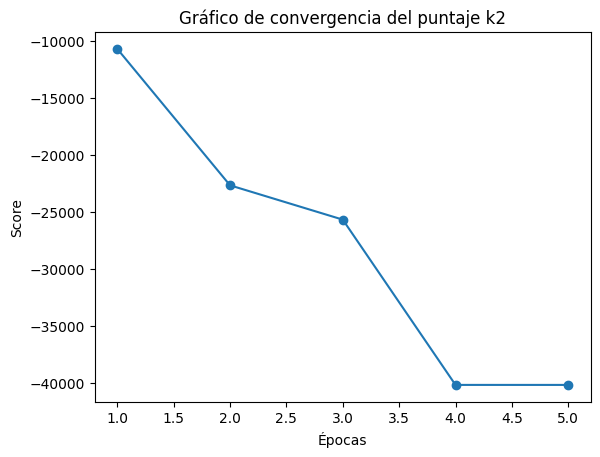

In [143]:
import matplotlib.pyplot as plt

epocas = list(range(1, len(all_scores) + 1))
# Crear el gráfico
plt.plot(epocas,all_scores, marker='o')

# Agregar título y etiquetas
plt.title('Gráfico de convergencia del puntaje k2')
plt.xlabel('Épocas')
plt.ylabel('Score')

# Mostrar el gráfico
plt.show()

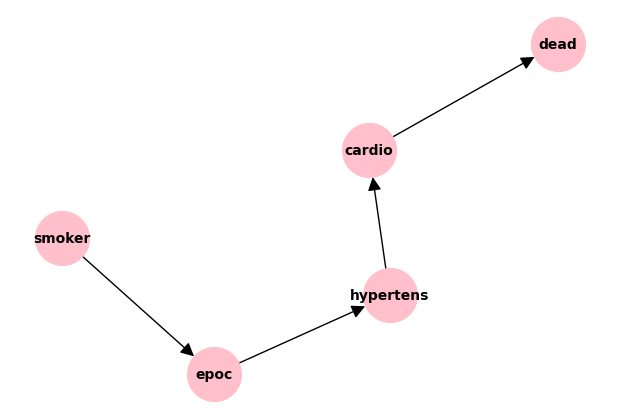

In [144]:
import networkx as nx
import matplotlib.pyplot as plt

# obtener el modelo grafico de la red bayesiana
data = best_structure_k2

df = pd.DataFrame(data, columns=['Source', 'Target'])

# Crear un grafo dirigido
G = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=nx.DiGraph())

colores = ['red', 'green', 'yellow', 'brown', 'purple', 'pink']
selec = random.choice(colores)

# Dibujar el grafo
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color=selec, font_size=10, font_weight="bold", arrowsize=20)
plt.show()

In [150]:
# Cargar el conjunto de datos
data = pd.read_csv('C:/Users/abrah/Downloads/Covid_CDMX_balanc.csv')
# Cambiar el tipo de dato de todas las columnas a string
data = data.astype(str)

In [151]:
# Estructura 
best_model = BayesianNetwork(best_structure_k2) # crear la estructura de la red bayesiana para poder utilizar la biblioteca
best_model.fit(data, estimator=MaximumLikelihoodEstimator) # calcular las tablas de probabilidad (parametros de la red) de la estructura bayesiana

Clasificar nuevas observaciones

In [152]:
# permite hacer preguntas a nuestro modelo bayesiano entrenado.
infert = VariableElimination(best_model) # actualizacion de creencias

[('smoker', 'epoc'), ('epoc', 'hypertens'), ('hypertens', 'cardio'), ('cardio', 'dead')]

In [216]:
# Ejemplo de predicción con nuevas observaciones
nueva_observacionn = {'hypertens': '1' ,'cardio': '1', 'smoker': '0'}
# infer.map_query: realiza inferencia sobre la red bayesiana.
# Inferencia MAP (Maximum A Posteriori).
# Utiliza el algoritmo de inferencia (eliminación de variables) para calcular la probabilidad de cada posible valor de la variable 'Recomendacion' dado los valores observados
# Devuelve el valor de 'Recomendacion' que maximiza la probabilidad condicional dada la evidencia proporcionada.
# Eliminación de Variables:  elimina las variables no deseadas en una red bayesiana para calcular la probabilidad marginal de las variables de interés.
prediccion = infert.map_query(variables=['dead'], evidence=nueva_observacionn)
print("Predicción para la nueva observación de la estructura:", prediccion)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Predicción para la nueva observación de la estructura: {'dead': '1'}


In [217]:
prediccion_proba = infert.query(variables=['dead'], evidence=nueva_observacionn)
print("Prediccion para 'dead' con la primer estructura:", prediccion_proba)

Prediccion para 'dead' con la primer estructura: +---------+-------------+
| dead    |   phi(dead) |
+=========+=============+
| dead(0) |      0.2415 |
+---------+-------------+
| dead(1) |      0.7585 |
+---------+-------------+


Consultas

In [160]:
# Para obtener la probabilidad de tener 'hypertens' dado que tiene 'smoker'
probabilidad = infert.query(variables=['hypertens'], evidence={'smoker': '0'})
print("Probabilidad de tener hypertens dado que es smoker:", probabilidad)

Probabilidad de tener hypertens dado que es smoker: +--------------+------------------+
| hypertens    |   phi(hypertens) |
+==============+==================+
| hypertens(0) |           0.7387 |
+--------------+------------------+
| hypertens(1) |           0.2613 |
+--------------+------------------+


# Metrica BIC

In [195]:
def combinaciones_var(variables_names):
    # Generar todas las combinaciones posibles de aristas
    all_possible_edges = [(u, v) for u in variables_names for v in variables_names if u != v]
    return all_possible_edges

# Función para verificar si una estructura es un DAG 
def is_dag(edges, nodes):
    G = ig.Graph(directed=True)
    G.add_vertices(nodes)
    G.add_edges(edges)
    cycles = G.feedback_arc_set()
    return not cycles

def invertir_direccion(edges, variables):
    if len(edges) == 1:
        return [(edges[0][1], edges[0][0])]

    possible_edges = edges[:] # lista auxiliar
    random.shuffle(possible_edges) # barajar las variables
    
    for al in possible_edges:
        reverso = (al[1], al[0])
        index = edges.index(al)
        edges[index] = reverso
        
        if is_dag(edges, variables):
            return edges
        else:
            edges[index] = al

    return edges

def add_arco(edges, tupla, nodes):
    # Convertir la lista de tuplas en una tupla única concatenada
    tup = tuple([item for sublist in tupla for item in sublist])

    # Obtener todos los arcos posibles a agregar
    possible_arcs = [t for t in edges if t not in tupla and t[0] in tup]

    # Barajar los arcos posibles para intentar en orden aleatorio
    random.shuffle(possible_arcs)

    for r in possible_arcs:
        tupla.append(r)
        if is_dag(tupla, nodes):
            return tupla
        else:
            tupla.remove(r)

    # Si no se puede agregar ningún arco sin formar un ciclo, retornar la estructura original
    return tupla

def delete_arco(estructura):
    if len(estructura) > 1:
        eliminar = random.choice(estructura)
        estructura.remove(eliminar)
        return estructura
    else:
        return estructura


# Cargar el conjunto de datos
df = pd.read_csv('C:/Users/abrah/Downloads/Covid_CDMX_balanc.csv')
# Cambiar el tipo de dato de todas las columnas a string
df = df.astype(str)
# Obtener los nombres de las variables
all_var = list(df.columns)
print(f'Columnas del dataframe: {all_var}')
print('\n')
# Generar las combinaciones entre pares de variables
combinaciones = combinaciones_var(all_var)

all_estructuras = [] # Almacenar las estructuras evaluadas
all_scores = []

# Mejores puntajes y estructuras
best_puntaje_BIC = float('-inf')
best_structure_BIC = None
# Empezar con una estructura inicial al azar
estructura_ = [random.choice(combinaciones)]
#estructura_ = [('Astigmatismo', 'Lagrima')]
scoresss = []

iterations_con_mejora = 0
max_iterations_con_mejora = 5 # maximo de iteraciones en caso de que el puntaje no mejore

for i in range(100):
    if iterations_con_mejora >= max_iterations_con_mejora:
        break

    seleccion = random.randint(1, 3)
    
    if seleccion == 1 and len(estructura_) < len(all_var) * (len(all_var) - 1):
        estructura_ = add_arco(combinaciones, estructura_, all_var)
    elif seleccion == 2:
        estructura_ = invertir_direccion(estructura_, all_var)
    else:
        estructura_ = delete_arco(estructura_)

    all_estructuras.append(estructura_)

    model = BayesianNetwork(estructura_)
    model.fit(df, estimator=MaximumLikelihoodEstimator)
    bic = BicScore(df)
    score = bic.score(model)
    scoresss.append(score)

    mejora = False
    # Guardar los mejores puntajes y estructuras
    if score > best_puntaje_BIC:
        best_puntaje_BIC = score
        best_structure_BIC = copy.deepcopy(estructura_)  # Usar deepcopy para evitar referencias
        all_scores.append(best_puntaje_BIC)
        mejora = True
    # Verificar si hubo alguna mejora
    if mejora:
        iterations_con_mejora = 0 # si el puntaje sigue mejorando, el contador se actualiza a 0
    else:
        iterations_con_mejora += 1 # si no hay cambios en el resultado de la metrica, se le aumenta 1

print("Mejor estructura BIC:", best_structure_BIC)
print("Mejor puntaje BIC:", best_puntaje_BIC)
print(f'Total de estructuras evaluadas: {len(all_estructuras)}')

Columnas del dataframe: ['sex', 'age', 'diabetes', 'epoc', 'asthma', 'hypertens', 'cardio', 'obesity', 'chronic_renal', 'smoker', 'dead']


Mejor estructura BIC: [('dead', 'cardio'), ('dead', 'diabetes'), ('cardio', 'diabetes')]
Mejor puntaje BIC: -27871.235929851297
Total de estructuras evaluadas: 7


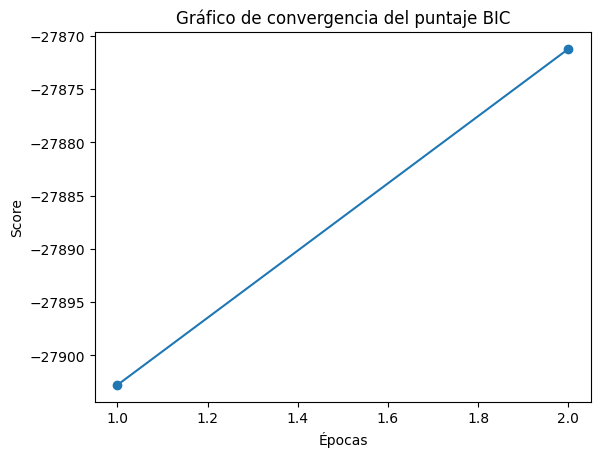

In [196]:
import matplotlib.pyplot as plt

epocas = list(range(1, len(all_scores) + 1))
# Crear el gráfico
plt.plot(epocas,all_scores, marker='o')

# Agregar título y etiquetas
plt.title('Gráfico de convergencia del puntaje BIC')
plt.xlabel('Épocas')
plt.ylabel('Score')

# Mostrar el gráfico
plt.show()

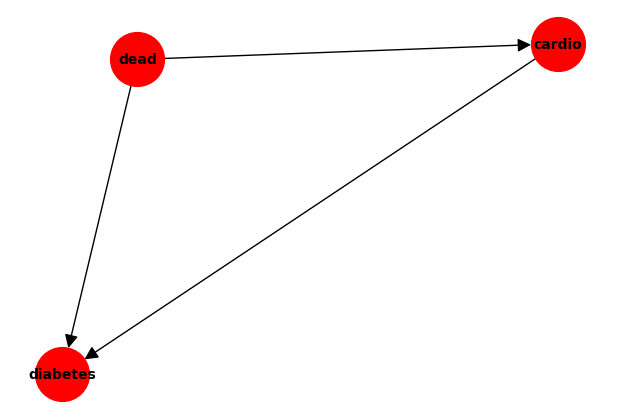

In [197]:
import networkx as nx
import matplotlib.pyplot as plt

# obtener el modelo grafico de la red bayesiana
data = best_structure_BIC

df = pd.DataFrame(data, columns=['Source', 'Target'])

# Crear un grafo dirigido
G = nx.from_pandas_edgelist(df, source='Source', target='Target', create_using=nx.DiGraph())

colores = ['red', 'green', 'yellow', 'brown', 'purple', 'pink']
selec = random.choice(colores)

# Dibujar el grafo
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color=selec, font_size=10, font_weight="bold", arrowsize=20)
plt.show()

In [199]:
d = pd.read_csv('C:/Users/abrah/Downloads/Covid_CDMX_balanc.csv')
# Cambiar el tipo de dato de todas las columnas a string
d = d.astype(str)

In [200]:
# Estructura 
best_modell = BayesianNetwork(best_structure_BIC) # crear la estructura de la red bayesiana para poder utilizar la biblioteca
best_modell.fit(d, estimator=MaximumLikelihoodEstimator) # calcular las tablas de probabilidad (parametros de la red) de la estructura bayesiana

Clasificar nuevas observaciones

In [201]:
# permite hacer preguntas a nuestro modelo bayesiano entrenado.
infere = VariableElimination(best_modell) # actualizacion de creencias

[('dead', 'cardio'), ('dead', 'diabetes'), ('cardio', 'diabetes')]

In [218]:
# Ejemplo de predicción con nuevas observaciones
nueva_obser = {'cardio': '0', 'diabetes': '0'}
# infer.map_query: realiza inferencia sobre la red bayesiana.
# Inferencia MAP (Maximum A Posteriori).
# Utiliza el algoritmo de inferencia (eliminación de variables) para calcular la probabilidad de cada posible valor de la variable 'Recomendacion' dado los valores observados
# Devuelve el valor de 'Recomendacion' que maximiza la probabilidad condicional dada la evidencia proporcionada.
# Eliminación de Variables:  elimina las variables no deseadas en una red bayesiana para calcular la probabilidad marginal de las variables de interés.
prediccion = infere.map_query(variables=['dead'], evidence=nueva_obser)
print("Predicción para la nueva observación de la estructura con la metrica BIC:", prediccion)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Predicción para la nueva observación de la estructura con la metrica BIC: {'dead': '0'}


In [219]:
prediccion_proba = infere.query(variables=['dead'], evidence=nueva_obser)
print("Prediccion para 'dead' con la  estructura con BIC:", prediccion_proba)

Prediccion para 'dead' con la  estructura con BIC: +---------+-------------+
| dead    |   phi(dead) |
+=========+=============+
| dead(0) |      0.5902 |
+---------+-------------+
| dead(1) |      0.4098 |
+---------+-------------+


Consultas

In [206]:
# Para obtener la probabilidad de tener 'diabetes' dado que tiene 'cardio'
probabilidad = infere.query(variables=['diabetes'], evidence={'cardio': '0'})
print("Probabilidad de tener diabetes dado cardio:", probabilidad)

Probabilidad de tener diabetes dado cardio: +-------------+-----------------+
| diabetes    |   phi(diabetes) |
+=============+=================+
| diabetes(0) |          0.7845 |
+-------------+-----------------+
| diabetes(1) |          0.2155 |
+-------------+-----------------+
